In [2]:
import numpy as np
import matplotlib.pyplot as plt

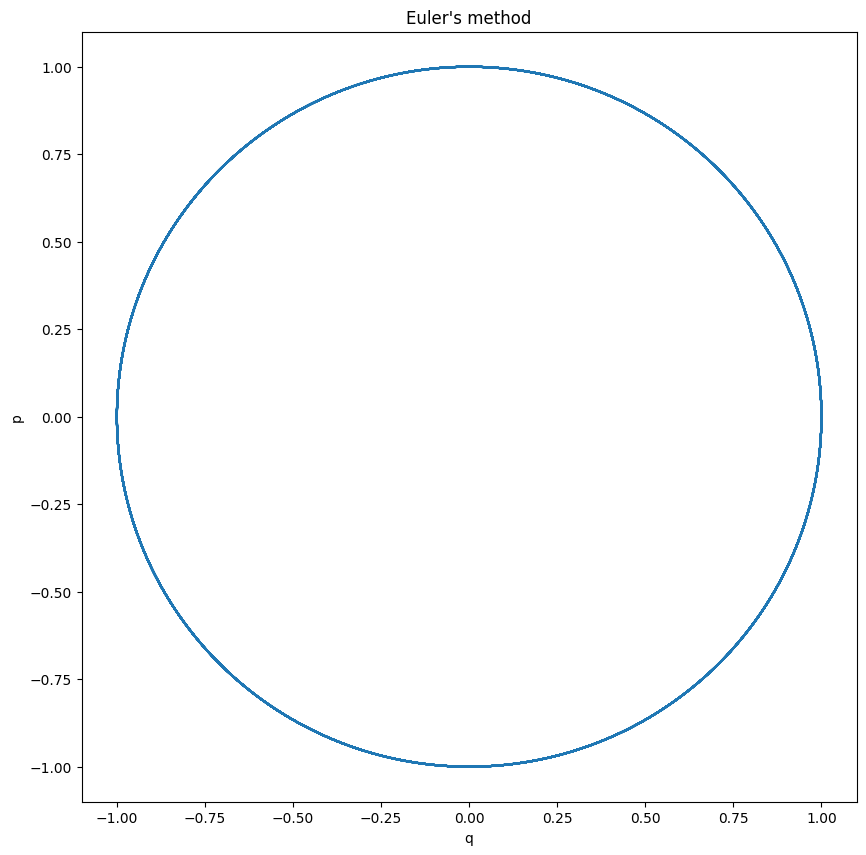

In [3]:
# Functions to be solved
# dq/dt = dH/dp -> q(t+1) = q(t) + dt*dH/dp
# dp/dt = -dH/dq -> p(t+1) = p(t) - dt*dH/dq

dt = 0.01 # time step
steps = 10000 # number of steps

q_th = lambda t : np.cos(t)
p_th = lambda t : -np.sin(t)

t = np.linspace(0,dt*steps,steps+1)

plt.figure(figsize=(10,10))
plt.title("Euler's method")
plt.xlabel("q")
plt.ylabel("p")
plt.plot(q_th(t),p_th(t))
plt.show()

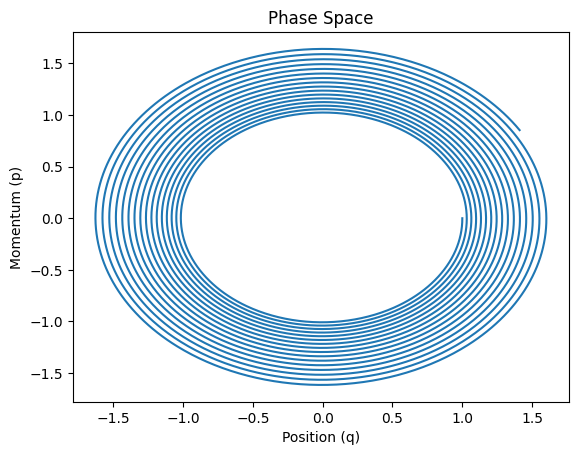

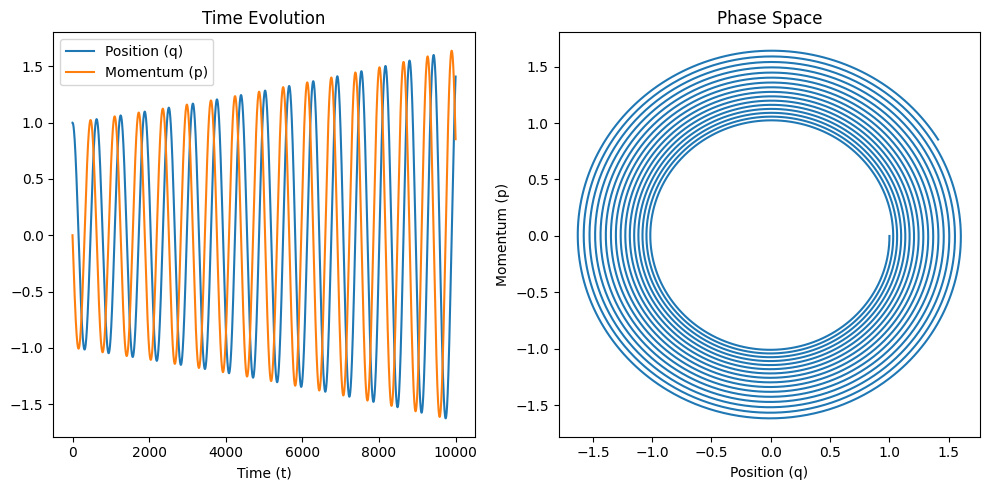

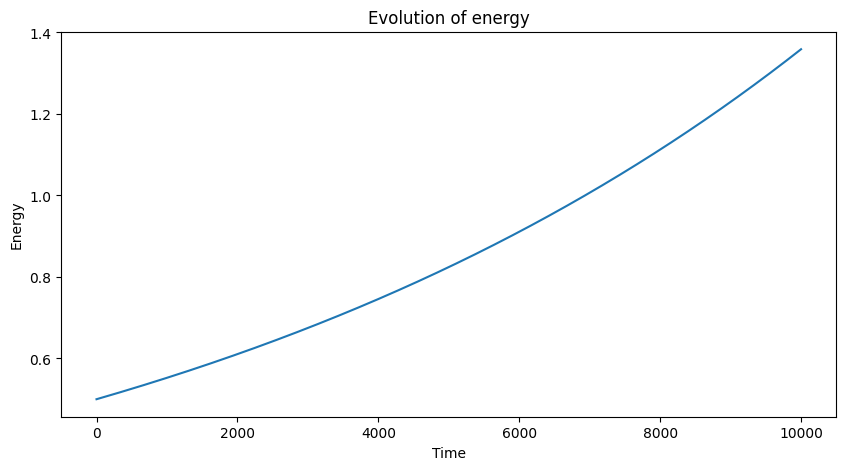

In [4]:
q = np.zeros(steps)
p = np.zeros(steps)

# Initial conditions
q[0] = 1.0
p[0] = 0.0

# Definition of Hamiltonian
H = lambda q, p, k=1.0, m=1.0: 0.5*k*q**2 + 0.5*p**2/m # H = K + V

# Definition of functions
def dHdp(p, m=1.0): # m is the mass
    return p/m

def dHdq(q, k=1.0): # k is 
    return k*q

# Euler method
for i in range(steps-1):
    q[i+1] = q[i] + dt*dHdp(p[i])
    p[i+1] = p[i] - dt*dHdq(q[i])

# Plotting of the Phase Space

plt.plot(q, p)
plt.xlabel("Position (q)")
plt.ylabel("Momentum (p)")
plt.title("Phase Space")
plt.show

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(q, label="Position (q)")
plt.plot(p, label="Momentum (p)")
plt.xlabel("Time (t)")
plt.legend()
plt.title("Time Evolution")

plt.subplot(1, 2, 2)
plt.plot(q, p)
plt.xlabel("Position (q)")
plt.ylabel("Momentum (p)")
plt.title("Phase Space")

plt.tight_layout()
plt.show()

# Plot of the energy
plt.figure(figsize=(10, 5))
plt.plot(H(q, p), label="Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Evolution of energy")
plt.show()



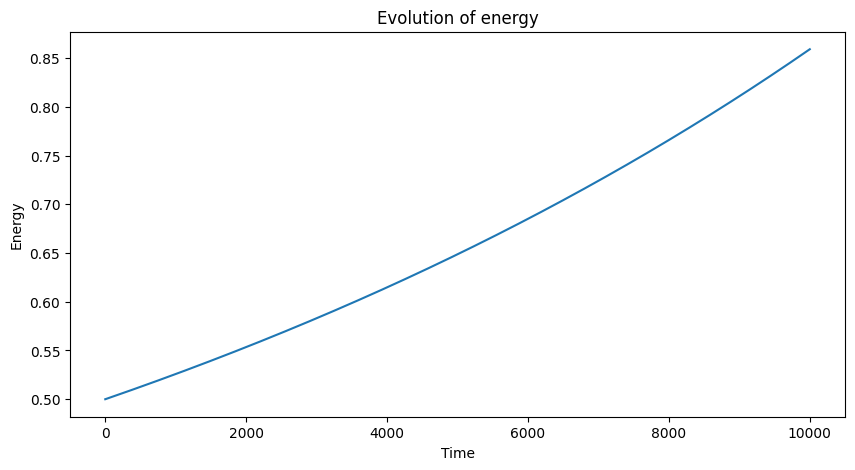

In [34]:
averages = np.zeros(steps)
for i in range(steps):
    averages[i] = np.mean(H(q[:i], p[:i]))

plt.figure(figsize=(10, 5))
plt.plot(averages, label="Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Evolution of energy")
plt.show()